# Logistinė regresija ir kiti klasifikatoriai

<br>

---

Mašininiame mokymęsi logistinė regresija naudojama klasifikacijos problemoms spręsti, ir atsako į klausimą taip, arba ne (priklauso elementas kokiai nors kategorijai ar ne). Jeigu 1 - taip, jeigu 0 -ne. 

![](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

Kreivė yra S formos, sigmoidas. Y ašyje matome reikšmes, nuo 0 iki 1. Tai yra mūsų atsakymas - taip arba ne. Reikšmės <0 ar >1 mes gauti negalime. X ašyje gali būti mūsų kintamieji. Pagal reikšmę X ašyje, naudojantis kreive,  surandama reikšmė Y ašyje. Tuomet pagal tai, ar reikšmė yra aukščiau ar žemiau vidurinės linijos, nusprendžiama, kuriai kategorijai ją priskirti. Čia yra [filmukas](https://youtu.be/yIYKR4sgzI8?t=189) (anglų k.), paprastai paaiškinantis logistinės regresijos veikimą.  

importuokime bibliotekas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
%matplotlib inline

Dirbsime su labai populiaria iris(liet. *vilkdalgis*) gėlių lentele. Mūsų modelis, pagal gėlės dalių išmatavimus turės atspėti tos gėlės porūšį. Lentelę turime integruotą seaborn bibliotekoje:

In [3]:
iris = sns.load_dataset('iris')
iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Kam įdomu, kas yra petal ir sepal, iliustracija:

![](https://cdn.britannica.com/s:1500x700,q:85/06/63306-004-0406576D/flower-part-purpose-seeds-making-insects-pollination.jpg)

Tikriname stulpelių informaciją:

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Įsitikinę, kad su trūkstamų reikšmių nėra, galime šiek tiek patyrinėti duomenis:

<Axes: xlabel='species', ylabel='count'>

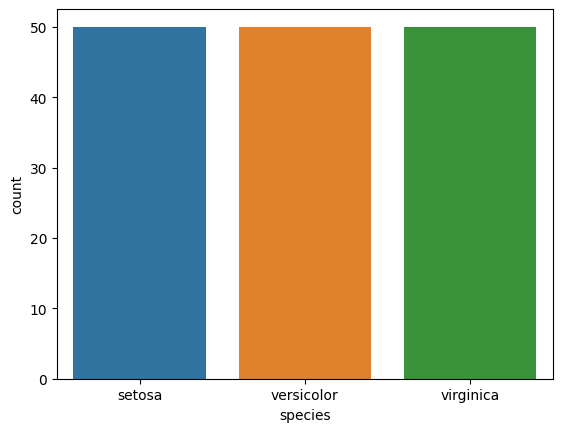

In [7]:
sns.countplot(iris, x='species', hue='species')

Visų po lygiai :)

Pažiūrėkime, kaip išsibarsto rūšys pagal visas išmatavimų kombinacijas:

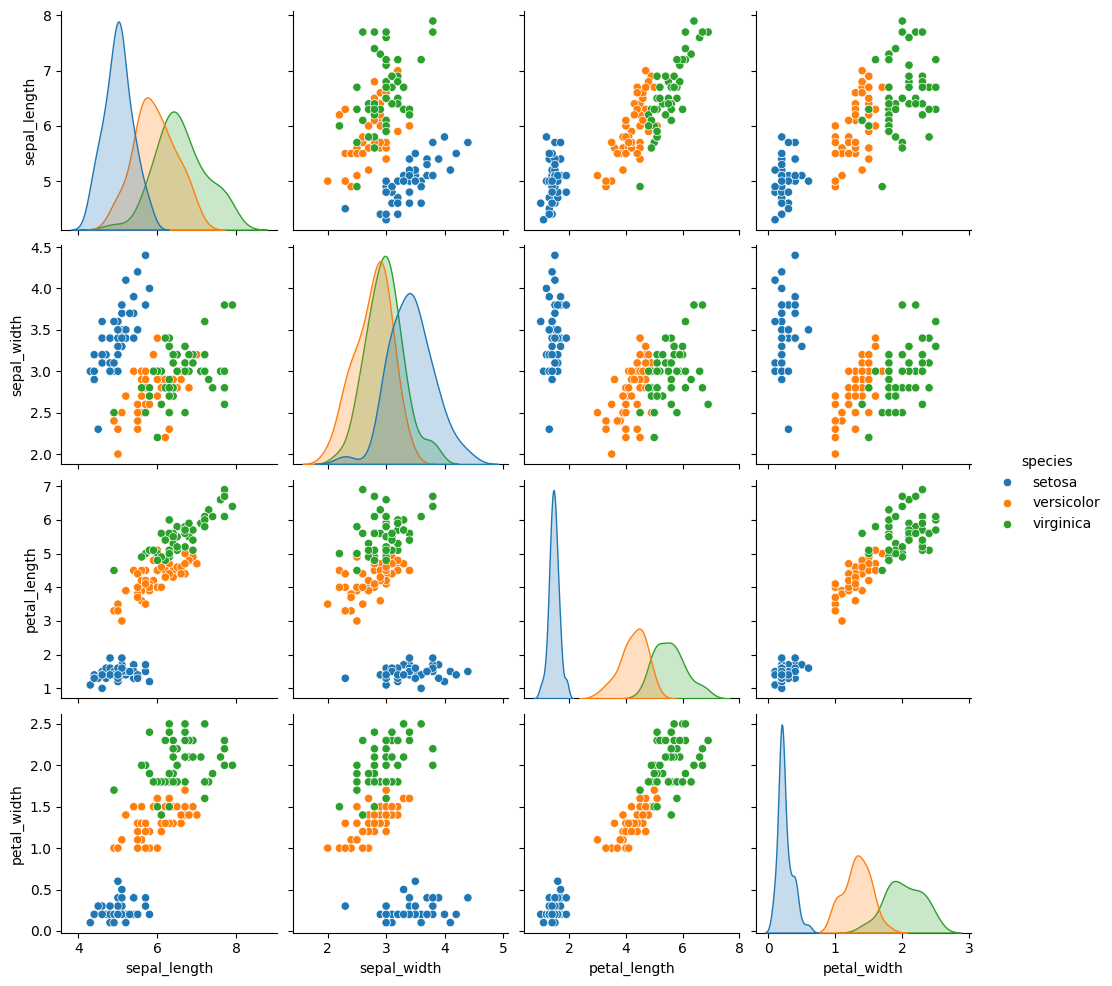

In [8]:
sns.pairplot(iris, hue='species')

Matome, kad rūšys linkę grupuotis, beveik pagal visas kombinacijas. Tai palanku klasifikavimo algoritmų tikslumui. Dar žvilgtelkime į koreliacijas ir pradėsime.

In [9]:
iris_corr = iris.corr(numeric_only=True)
iris_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [10]:
parameters = iris[iris.columns[:-1]]
parameters.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: >

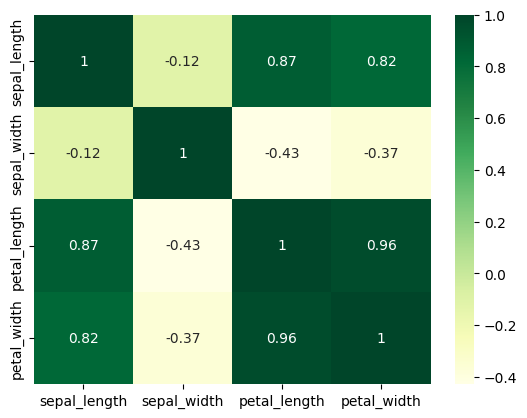

In [11]:
sns.heatmap(iris_corr, annot=True, cmap='YlGn')

### Duomenų paruošimas

Duomenų paruošimas nelabai skirsis nuo duomenų paruošimo tiesinės regresijos atveju. Atskirkime *target* stulpelį nuo likusių duomenų:

In [12]:
targets = iris['species']
targets.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [13]:
targets.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<br>

## Logistinės regresijos importavimas ir apmokymas

In [14]:
from sklearn.model_selection import train_test_split
par_train, par_test, tar_train, tar_test = \
train_test_split(parameters, targets, test_size=0.4, random_state=777)

In [15]:
from sklearn.linear_model import LogisticRegression
iris_log_model = LogisticRegression().fit(par_train, tar_train)
iris_log_model.score(par_test, tar_test)

0.9833333333333333

Patikrinkime modelio tikslumą kurioje vietoje testavimo razultatai nesutapo:

In [16]:
iris_pred = iris_log_model.predict(par_test)
iris_pred

array(['virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica'], dtype=object)

Neblogai.<br>

Toliau darysime praktiškai tą patį, kaip ir tiesinės regresijos paskaitoje, kad šalia sudėtumėm spėjimus ir tikrąsias reikšmes:

In [17]:
iris_comp = pd.concat([tar_test.reset_index(), pd.Series(iris_pred, name='prediction')], axis=1)
iris_comp

,index,species,prediction
0,117,virginica,virginica
1,12,setosa,setosa
2,102,virginica,virginica
3,113,virginica,virginica
4,63,versicolor,versicolor
5,48,setosa,setosa
6,135,virginica,virginica
7,128,virginica,virginica
8,18,setosa,setosa
9,21,setosa,setosa


Padarome palyginimą:

In [18]:
iris_comp[iris_comp['species'] != iris_comp['prediction']]

,index,species,prediction
51,77,versicolor,virginica


Klasifikacijos rezultatams interpretuoti yra *confusion matrix*:

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(tar_test, iris_pred)
cm

array([[21,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 25]], dtype=int64)

<Axes: >

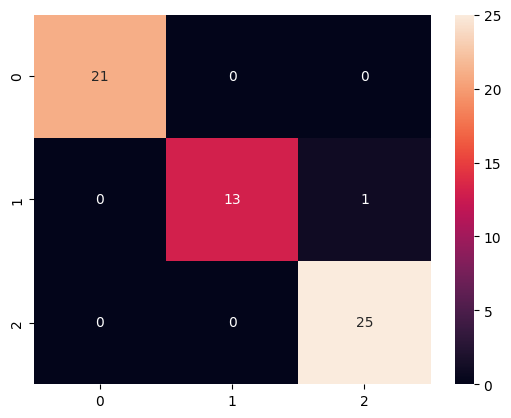

In [20]:
sns.heatmap(cm, annot=True)

kaip interpretuoti? Pasiskolinkime diagramą:
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png)

Y ašyje turime tikrąsias reikšmes, X ašyje spėjimus. Ten kur spėjimas sutampa su tikrąja reikšme (įstrižainėje), turime pataikymus. Likusios reikšmės - šūviai pro šalį.

# Kiti klasifikatoriai

Logistinė regresija nėra vienintelis klasifikavimo modelis. Iš tiesų, jų yra labai daug. Vieni tam tikriems duomenims tinka labiau, kiti geresni su kitokio pobūdžio duomenimis. Panagrinėkime dar porą populiarių variantų:

### Decision Trees

![](https://www.sqlshack.com/wp-content/uploads/2019/09/sample-of-a-decision-tree.png)

Į Decision Tree galima žiūrėti, kaip į *if-else* sąlygų rikiuotę. Algoritmas atsirenka, koks stulpelis turi didžiausią įtaką rezultatui. Tuomet juos išsidėlioja reikiama tvarka ir tikrina prie kokios stulpelio reikšmės koks yra atsakymas. Galima sakyti, leidžia duomenis žemyn, kaip per filtrą. Tokiu būdu mokosi. Iris lentelės atveju, procesas atrodytų maždaug taip:

![](https://github.com/adityashrm21/adityashrm21.github.io/blob/master/_posts/imgs/dt/dtree_big.png?raw=True)

Apie *decision trees* galite pažiūrėti [čia](https://www.youtube.com/watch?v=7VeUPuFGJHk)

Turime paruoštus duomenis, kuriuos galime nesunkiai praleisti per klasifikatorių: 

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc.score(X_test, y_test)

NameError: name 'X_train' is not defined

turėkite omenyje, kad DecisionTree dažniau bus neefektyvus, negu efektyvus, kadangi dirbame su 'žaisliniais' duomenimis.

### Random Forests

Random Forests yra galingas klasifikatorius, sukurtas *DecisionTrees* pagrindu. Jis generuoja daug *DecisionTree modelių*, kuriuose atsitiktine tvarka išdėstytos kategorijos: 

![](https://i.stack.imgur.com/iY55n.jpg)

Įsivaizduokite tų medelių ne tris, o 1000 :). Nurodykime juos parametruose:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
iris_rand_forests = RandomForestClassifier().fit(par_train, tar_train)
iris_rand_forests.score(par_test, tar_test)

Dirbdami su rimtesniais duomenimis, pajausite, kaip tokių 'miškelių' generavimas apkrauna kompiuterio resursus. Bet tuo pačiu galėsite įvertinti, koks stiprus klasifikatorius yra RandomForests.

### KNearrest Neighbors

KNearest Neighbors veikimo principą nesudėtinga suprasti - skaičiuojami atstumai iki artimiausių kaimynų.

![](https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif)

kokiai klasei priklausančių kaimynų 'mėginys' turi daugiausiai, tai klasei ir priskiriamas.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
iris_knn = KNeighborsClassifier(n_neighbors=11).fit(par_train, tar_train)
iris_knn.score(par_test, tar_test)

Pažiūrėkime, kaip KNN sekasi spėlioti žuvies rūšis (medžiaga iš praeitos užduoties)

In [ ]:
fish = pd.read_csv('Fish.csv')
fish_params = fish[fish.columns[1:]]
fish_targets = fish['Species']
fish_params.describe()

Matome, kad ne itin gerai sekasi. Taip yra todėl, kad duomenys 'atstumais' yra gana stipriai išsibarstę, o KNN mėgsta juos labiau sugrupuotus, todėl didesnėms reikšmėms reikia taikyti tam tikrus koeficientus. Rankiniu būdu to daryti nereikės, scikit-learn turi tam skirtus integruotus metodus.

In [ ]:
from sklearn.preprocessing import StandardScaler
fish_scaler = StandardScaler().fit(fish_params)
fish_scaled_data = fish_scaler.transform(fish_params)
fish_scaled_params = pd.DataFrame(fish_scaled_data, columns=fish_params.columns)
fish_targets.info()

In [ ]:
fp_train, fp_test, ft_train, ft_test = \
train_test_split(fish_scaled_params, fish_targets, test_size=0.33, random_state=42)

In [ ]:
fish_knn = KNeighborsClassifier(n_neighbors=9).fit(fp_train, ft_train)
fish_knn.score(fp_test, ft_test)

Dabar pabandykime surasti optimalią n_neighbors reikšmę:

In [ ]:
def find_optimal_knn(max_neighbors, fp_train, fp_test, ft_train, ft_test):
    score_list = pd.Series(name='score')
    for n in range(3, max_neighbors, 2):
        fish_knn = KNeighborsClassifier(n_neighbors=n).fit(fp_train, ft_train)
        score_list[n] = fish_knn.score(fp_test, ft_test)
    return score_list

In [ ]:
scores = find_optimal_knn(20, *train_test_split(
    fish_scaled_params, fish_targets, 
    test_size=0.25, random_state=777
))
print(scores)
sns.lineplot(scores)

<br>
<br>

# Užduotys:

---

Užduočių sprendimui mums reikalingi kai kurie įrankiai ir duomenys.<br>

Siekinat sklandaus darbo rezultato, kai kurie įrankiai šioje temoje pasikartoja.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
%matplotlib inline

In [24]:
heart = pd.read_csv('heart.csv')

In [25]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<img src="heart.jfif">

<br>
<br>

## Užduoties sąlyga:

Dirbsime su širdies ligų duomenimis. Turime lentelę, kurios kintamieji yra paciento duomenys ir klinikiniai rodikliai, o stulpelis target rodo, ar turi pacientas širdies ligą, ar ne. Išanalizuokite duomenis, ir sukurkite 4 modelius, kurie bandys 'diagnozuoti' širdies veiklos sutrikimus. Darbo eiga(apytikriai):

* importuokite bibliotekas, nuskaitykite csv failą (copy paste iš šio dokumento)

* išanalizuokite duomenis, atsispausdinkite keletą, jūsų nuomone, svarbių diagramų.

* patikrinkite, ar duomenyse yra trūkstamų reikšmių, jeigu yra, sutvarkykite.

* paruoškite duomenis modelio apmokymui
apmokykite LogisticRegression, DecisionTree, RandomForests modelius, nustatykite jų efektyvumą, atsispausdinkite confusion matricas.

* pasidarykite lentelės kopiją, ir jos pagrindu paruoškite duomenis KNearestNeighbor klasifikatoriui.

* apmokykite KNN, nustatykite jo efektyvumą, atsispausdinkite confusion matricą.

* kuris modelis efektyviausias?

* Palyginkite confusion matricas, įvertinkite, kuri pozicija jose gali būti svarbesnė už patį modelio efektyvumą (hint hint - neteisingos diagnozės..)

Dėl medicinos terminų nesijaudinkite, mums tikrai nereikia visko suprasti.

<Axes: xlabel='target', ylabel='count'>

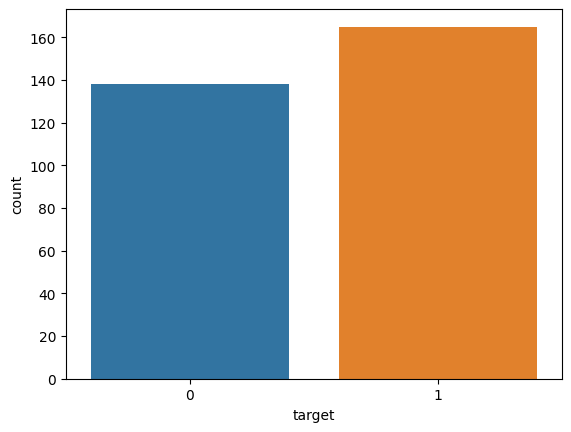

In [26]:
sns.countplot(x='target', data=heart, hue='target', palette='tab10', legend=False)

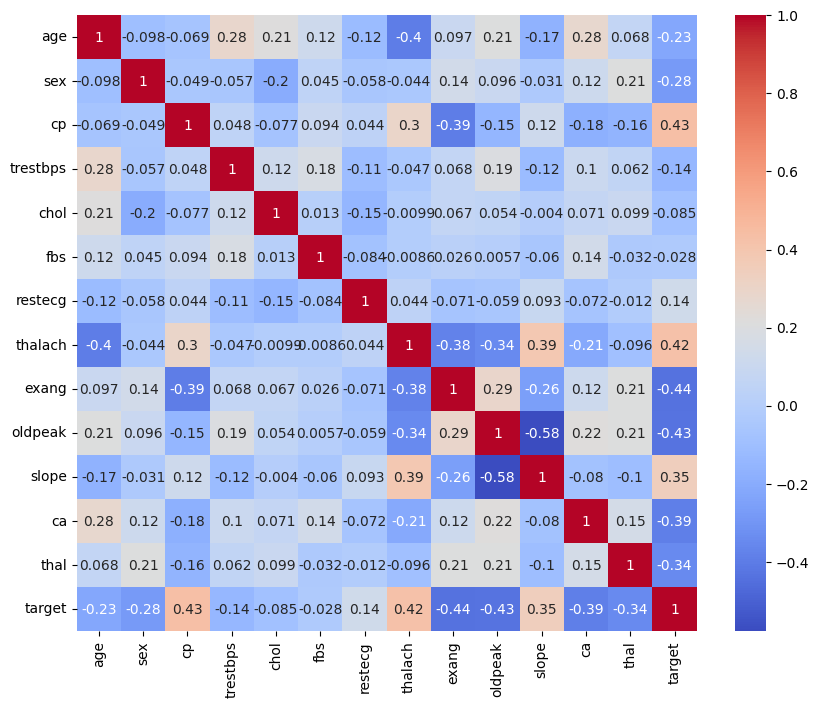

In [27]:
f, ax = plt.subplots(figsize=(10, 8))
mtx = sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')

Įdomu tai, kad su target reikšme labiausiai koreliuoja fizinio krūvio metu nustatomi rodikliai. O kraujo spaudimas ir cholesterolis koreliuoja labai menkai. Palyginti, nemažai įtakos turi amžius ir lytis.

In [28]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='trestbps', ylabel='chol'>

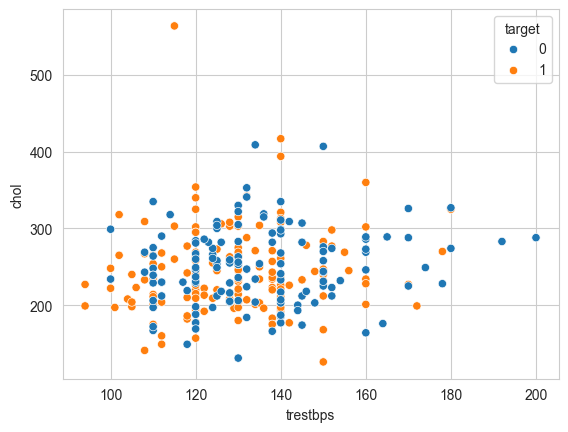

In [29]:
sns.set_style('whitegrid')
sns.scatterplot(x='trestbps', y='chol', data=heart, hue='target')

Deja, sunkiai pavyksta atspausdinti kažką, kas rodytų didesnius kontrastus. Pamėginkime .pairplot() su išmestomis kategorinėmis reikšmėmis:

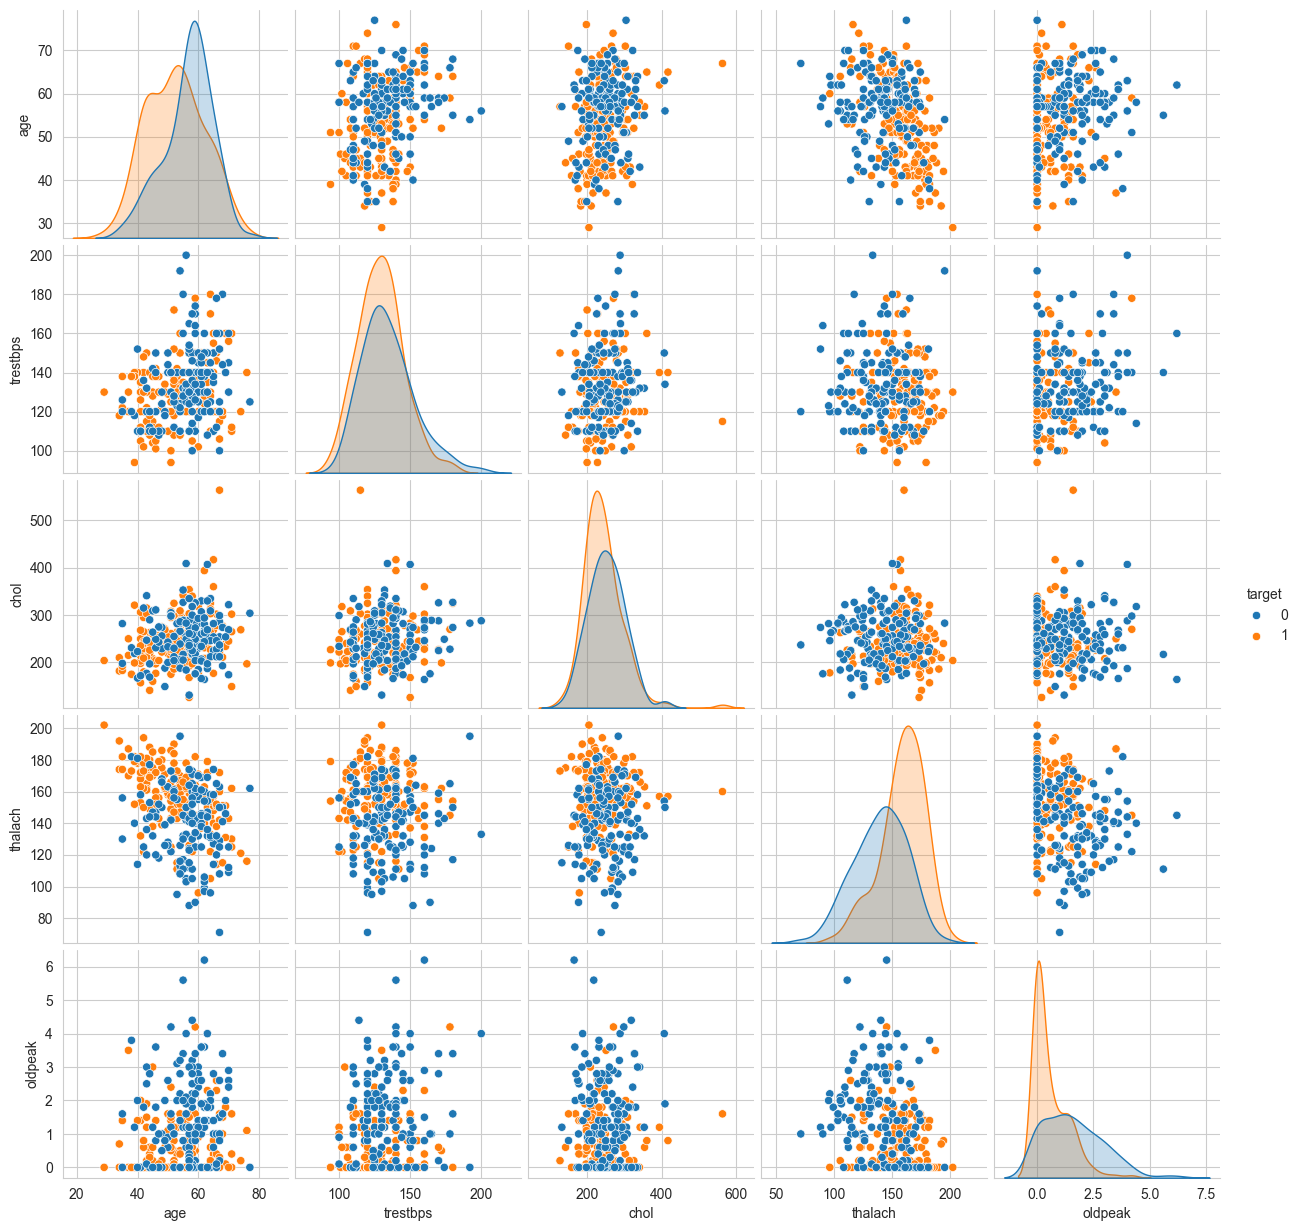

In [30]:
sns.pairplot(heart.drop(columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']), hue='target')

Panašu, kad target reikšmės tam tikrose porose grupuojasi, galime tikėtis neblogų modelių efektyvumų.

In [31]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Išrinksime kategorines reikšmes, kurios turi daugiau negu 2 reikšmes, sukursime dummies:

In [33]:
heart['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [34]:
heart['slope'].unique()

array([0, 2, 1], dtype=int64)

In [35]:
heart['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [36]:
heart['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [37]:
dummies_cp = pd.get_dummies(heart['cp'])
dummies_cp.columns = ['cp0', 'cp1', 'cp2', 'cp3']
dummies_slope = pd.get_dummies(heart['slope'])
dummies_slope.columns = ['slope0', 'slope1', 'slope2']
dummies_ca = pd.get_dummies(heart['ca'])
dummies_ca.columns = ['ca0', 'ca1', 'ca2', 'ca3', 'ca4']
dummies_thal = pd.get_dummies(heart['thal'])
dummies_thal.columns = ['thal0', 'thal1', 'thal2', 'thal3']

In [38]:
dummies = pd.concat([dummies_ca, dummies_cp, dummies_slope, dummies_thal], axis=1)
dummies.head()

,ca0,ca1,ca2,ca3,ca4,cp0,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False
1,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
4,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False


Dummies sukurti, dabar jungsime su pagrindine lentele:

In [39]:
heart.drop(columns = ['ca', 'cp', 'slope', 'thal'], inplace=True)
df = pd.concat([heart, dummies], axis=1)

In [40]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,1,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,1,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,1,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,1,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,1,...,False,False,False,False,False,True,False,False,True,False


In [41]:
X = df.drop('target', axis=1)

In [42]:
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca0,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,True,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,True,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,True,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,True,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,True,...,False,False,False,False,False,True,False,False,True,False


In [43]:
y = df.drop('target', axis=1)

In [44]:
y.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca0,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,True,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,True,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,True,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,True,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,True,...,False,False,False,False,False,True,False,False,True,False


In [47]:
y = df['target']

Viskas!<br>

Visus kitus kodų parametrus galime imti iš paskaitos metu pateiktos medžiagos!

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4, random_state=42)

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=249).fit(X_train, y_train)

c:\Users\DELL G5\Documents\CodeAcademy\monda_py01\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
model.score(X_train, y_train)

0.8729281767955801

In [53]:
lr_preds = model.predict(X_test)
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_preds)
lr_cm

array([[44,  8],
       [ 6, 64]], dtype=int64)

<Axes: >

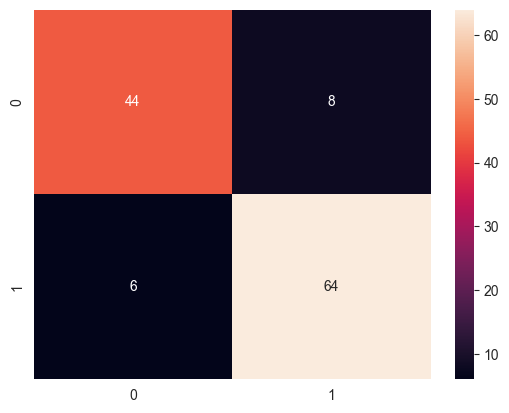

In [54]:
sns.heatmap(lr_cm, annot=True)

Pažaiskime su parametrais. Perspėjimo žinutėje nurodyta, kad solver parametras automatiškai nustatomas 'lbfgs'. Paskaitę dokumentaciją galime išsiaiškinti, kokie yra galimi variantai. 'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs'. Pasibandykime su visais:

In [55]:
from sklearn.linear_model import LogisticRegression
model_newton_cg = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

In [56]:
lr_newton_preds = model_newton_cg.predict(X_test)
from sklearn.metrics import confusion_matrix
lr_newton_cm = confusion_matrix(y_test, lr_newton_preds)
lr_newton_cm

array([[44,  8],
       [ 5, 65]], dtype=int64)

<Axes: >

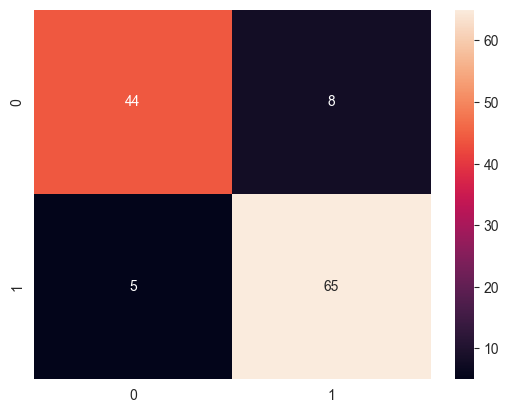

In [57]:
sns.heatmap(lr_newton_cm, annot=True)

Viena diagnoze tiksliau! Galbūt išgelbėjome gyvybę!

## Decision Trees

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7540983606557377

In [59]:
dtc_preds = dtc.predict(X_test)
dtc_cm = confusion_matrix(y_test, dtc_preds)
dtc_cm

array([[41, 11],
       [19, 51]], dtype=int64)

<Axes: >

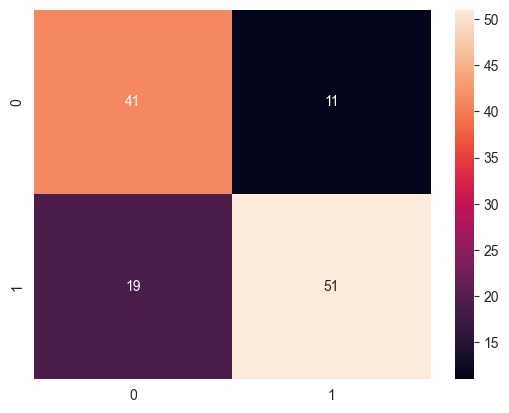

In [60]:
sns.heatmap(dtc_cm, annot=True)

## Random Forests:

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5000).fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8360655737704918

Bežaidžiant su miškų kiekiu, aiškėja, kad kompiuteris susitvarko nesunkiai, tad paieškokim optimalios vertės:

In [62]:
def optimal_estimators(state, est):
    list_of_dicts = []
    for s in range(state):
        index_value_pairs = {}
        for i in range(est):
            rfc = RandomForestClassifier(n_estimators = i+1, random_state= s+1).fit(X_train, y_train)
            index_value_pairs.update({f'estimators{i+1}':rfc.score(X_test, y_test)})
        list_of_dicts.append(index_value_pairs)
    return list_of_dicts

Parašėme funkciją, kuri praleidžia per ciklus nurodytą skaičių state, ir estimators parametrų. State reikalingas tam, kad fiksuotų random forest atsitiktinių reikšmių generatoriaus statusą. Tokiu būdu, apmokius modelį iš naujo, turėsime tas pačias reikšmes:

In [63]:
opt = optimal_estimators(100, 100) # ilgai užtruks, gali iki ~10min.

Sudėkime gautą sąrašą iš žodynų į DataFrame:

In [64]:
best_values = pd.DataFrame(opt).T
best_values.columns = columns = list(range(1, len(opt)+1))
best_values.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
estimators1,0.754098,0.778689,0.754098,0.803279,0.737705,0.770492,0.729508,0.729508,0.696721,0.786885,...,0.737705,0.729508,0.704918,0.786885,0.737705,0.786885,0.786885,0.721311,0.762295,0.729508
estimators2,0.688525,0.696721,0.729508,0.786885,0.704918,0.762295,0.647541,0.696721,0.696721,0.704918,...,0.663934,0.663934,0.713115,0.745902,0.696721,0.737705,0.721311,0.737705,0.696721,0.721311
estimators3,0.770492,0.827869,0.795082,0.811475,0.803279,0.827869,0.770492,0.729508,0.778689,0.811475,...,0.737705,0.762295,0.770492,0.795082,0.729508,0.770492,0.795082,0.803279,0.803279,0.811475
estimators4,0.770492,0.754098,0.770492,0.778689,0.770492,0.745902,0.745902,0.745902,0.762295,0.754098,...,0.729508,0.737705,0.770492,0.745902,0.754098,0.770492,0.754098,0.786885,0.754098,0.786885
estimators5,0.778689,0.819672,0.811475,0.844262,0.811475,0.795082,0.762295,0.786885,0.827869,0.836066,...,0.803279,0.803279,0.786885,0.836066,0.770492,0.786885,0.754098,0.844262,0.778689,0.819672


Turime lentelę su 10000 reikšmių.

In [65]:
best_values.max().idxmax() # sužinome stulpelio nr. Tai mūsų *random_state* parametras.

35

In [66]:
best_values.idxmax()[35] #sužinome savo estimators parametrą

'estimators7'

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc_optimized = RandomForestClassifier(n_estimators = 11, random_state=35).fit(X_train, y_train)
rfc_optimized.score(X_test, y_test)

0.8852459016393442

In [68]:
rfc_preds = rfc_optimized.predict(X_test)
rfc_cm = confusion_matrix(y_test, rfc_preds)
rfc_cm

array([[46,  6],
       [ 8, 62]], dtype=int64)

<Axes: >

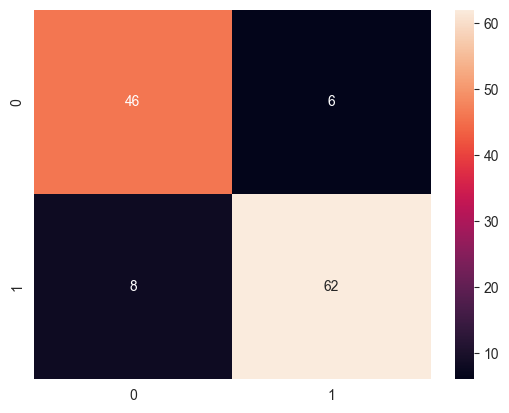

In [69]:
sns.heatmap(rfc_cm, annot=True)

In [70]:
y_test.value_counts()

target
1    70
0    52
Name: count, dtype: int64

## KNearest Neighbors

Pradėsime nuo duomenų paruošimo KNN klasifikatoriui. Turime per scaler'į praleisti viską, išskyrus 'target stulpelį'. Tuomet pakeistas reikšmes ir target stulpelį paduoti į train_test_split. Target stulpelį turime jau gatavą. O modifikuosime tą dalį, kuri dabar X kintamąjame.

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X) # sukuriame StandardScaler objektą
scaled_features = scaler.transform(X) # perdarome reikšmes į KNN klasifikatoriui priimtinesnį formatą
scaled_features[:4]

array([[ 0.9521966 ,  0.68100522,  0.76395577, -0.25633371,  2.394438  ,
        -1.00583187,  0.01544279, -0.69663055,  1.08733806,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
        -0.44455422, -0.63464776,  3.4891135 ,  3.66450153, -0.92676626,
        -0.93914194, -0.08151391,  3.97911213, -1.10076284, -0.79311554],
       [-1.91531289,  0.68100522, -0.09273778,  0.07219949, -0.41763453,
         0.89896224,  1.63347147, -0.69663055,  2.12257273,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
        -0.44455422,  1.57567719, -0.28660575,  3.66450153, -0.92676626,
        -0.93914194, -0.08151391, -0.25131234,  0.9084609 , -0.79311554],
       [-1.47415758, -1.46841752, -0.09273778, -0.81677269, -0.41763453,
        -1.00583187,  0.97751389, -0.69663055,  0.31091206,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
         2.24944438, -0.63464776, -0.28660575, -0

In [72]:
features = pd.DataFrame(scaled_features, columns=X.columns)

In [73]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   trestbps  303 non-null    float64
 3   chol      303 non-null    float64
 4   fbs       303 non-null    float64
 5   restecg   303 non-null    float64
 6   thalach   303 non-null    float64
 7   exang     303 non-null    float64
 8   oldpeak   303 non-null    float64
 9   ca0       303 non-null    float64
 10  ca1       303 non-null    float64
 11  ca2       303 non-null    float64
 12  ca3       303 non-null    float64
 13  ca4       303 non-null    float64
 14  cp0       303 non-null    float64
 15  cp1       303 non-null    float64
 16  cp2       303 non-null    float64
 17  cp3       303 non-null    float64
 18  slope0    303 non-null    float64
 19  slope1    303 non-null    float64
 20  slope2    303 non-null    float6

In [74]:
from sklearn.neighbors import KNeighborsClassifier
XX_train, XX_test, yy_train, yy_test = \
train_test_split(features, y, test_size=0.4, random_state=42)
heart_knc = KNeighborsClassifier(n_neighbors = 103).fit(XX_train, yy_train)
heart_knc.score(XX_test, yy_test)

0.8934426229508197

In [75]:
knc_preds = heart_knc.predict(XX_test)
knc_cm = confusion_matrix(yy_test, knc_preds)
knc_cm

array([[42, 10],
       [ 3, 67]], dtype=int64)

In [ ]:
sns.heatmap(knc_cm, annot=True)

Kaip buvo ieškomos optimalios `neighbors` reikšmės:

In [76]:
def find_optimal(neighbors):
    score_dict = {}
    for i in range(neighbors):
        knc_optimized = KNeighborsClassifier(n_neighbors = i+1).fit(XX_train, yy_train)
        score_dict.update({i+1:knc_optimized.score(XX_test, yy_test)})
    return score_dict

In [77]:
neighbors_dict = find_optimal(132)
max_sample = max(neighbors_dict, key=neighbors_dict.get)
max_sample

101

In [78]:
neighbors_dict[101]

0.8934426229508197

In [79]:
indexes = []
for k, v in neighbors_dict.items():
    if v == 0.8934426229508197:
        indexes.append(k)
indexes

[101, 103]